# China Stats from here
http://data.stats.gov.cn/english/easyquery.htm?cn=A01

In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/China Data (for #10)/'
PPI_raw = pd.read_csv(root + 'China PPI.csv')
CPI_raw = pd.read_csv(root + 'China CPI.csv')
UR_raw = pd.read_csv(root + 'China Unemployment Rates.csv')

## China PPI 

In [6]:
PPI1 = PPI_raw.T

PPI1 = PPI1.dropna(axis='columns')
PPI = PPI1.iloc[1:,:]
PPI.columns = ['Overall', 'Fuel_and_Power', 'Ferrous_Metals', 'Nonferrous_Metals', 'Raw_Chemicals', 'Pulp_and_Paper', 'Building_Mtrls', 'Other_Industrial_Mtrls', 'Agriculture', 'Textiles']
time = np.arange('2000-01', '2020-05', dtype = 'datetime64[M]')
PPI.index = time[::-1]
PPI = PPI.sort_index(axis = 0)

PPI['Date'] = PPI.index
PPI.index = np.arange(0,PPI.shape[0])
col = PPI.pop('Date') # cut the Months column from where it was at the end of the table
PPI.insert(0, col.name, col) # insert the column at column 0 of the data frame
PPI

Date Overall  ... Agriculture Textiles
0   2000-01-01   102.1  ...        93.2     97.1
1   2000-02-01   103.6  ...        92.2    103.8
2   2000-03-01   104.8  ...        94.8    101.3
3   2000-04-01   105.3  ...        96.8    101.4
4   2000-05-01   105.5  ...        99.2    101.9
..         ...     ...  ...         ...      ...
239 2019-12-01    98.7  ...       106.6     97.1
240 2020-01-01    99.7  ...         107     97.2
241 2020-02-01    99.5  ...       107.6     97.2
242 2020-03-01    98.4  ...       107.2     97.1
243 2020-04-01    96.2  ...       106.8     96.4

[244 rows x 11 columns]

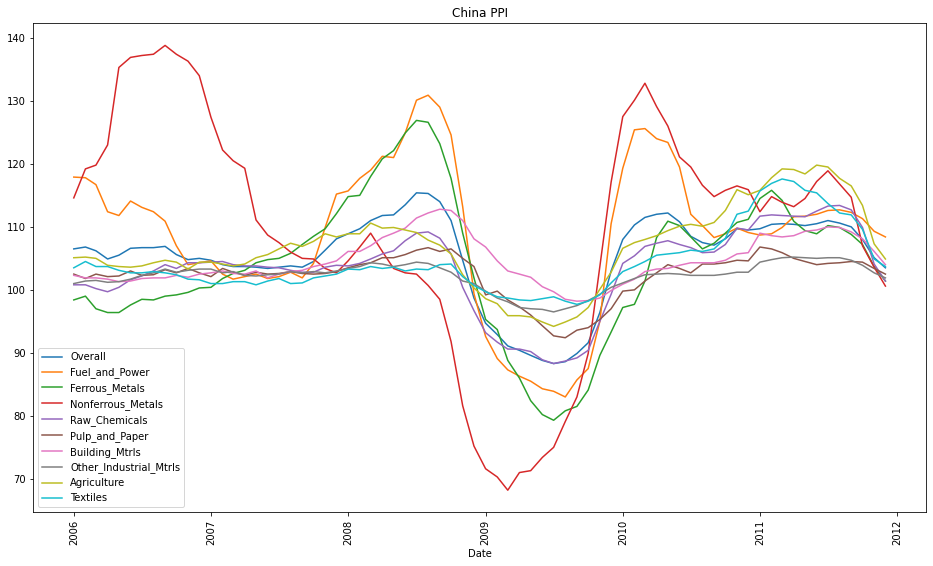

In [7]:
start_date= PPI.loc[PPI.Date == np.datetime64('2006-01-01')].index[0]
end_date= PPI.loc[PPI.Date == np.datetime64('2012-01-01')].index[0]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(1,PPI.shape[1]):
  try:
    plt.plot(PPI.iloc[start_date:end_date,0], PPI.iloc[start_date:end_date, column],label = f'{PPI.iloc[:,column].name}')
  except: 
    pass

plt.legend()
plt.title('China PPI')
plt.xlabel("Date")
plt.show()


Now i will make simple moving averages for each of the columns and replot to see if the data is smoother/clearer

In [9]:
PPI_sma = PPI
for i in range(1, 11):
  PPI_sma[f'{PPI.iloc[:,i].name}_sma'] = PPI.loc[:,[f'{PPI.iloc[:,i].name}']].rolling(window=12, center = True).mean() # simpl3 moving average over a year

PPI_sma

Date Overall  ... Agriculture_sma Textiles_sma
0   2000-01-01   102.1  ...             NaN          NaN
1   2000-02-01   103.6  ...             NaN          NaN
2   2000-03-01   104.8  ...             NaN          NaN
3   2000-04-01   105.3  ...             NaN          NaN
4   2000-05-01   105.5  ...             NaN          NaN
..         ...     ...  ...             ...          ...
239 2019-12-01    98.7  ...             NaN          NaN
240 2020-01-01    99.7  ...             NaN          NaN
241 2020-02-01    99.5  ...             NaN          NaN
242 2020-03-01    98.4  ...             NaN          NaN
243 2020-04-01    96.2  ...             NaN          NaN

[244 rows x 21 columns]

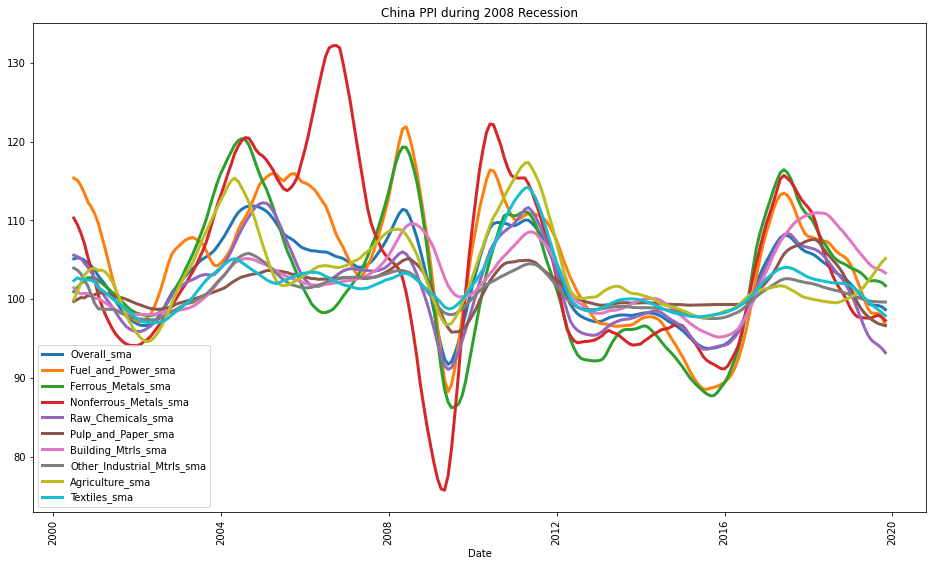

In [10]:
start_date= PPI.loc[PPI.Date == np.datetime64('2000-01-01')].index[0]
end_date= PPI.loc[PPI.Date == np.datetime64('2020-04-01')].index[0]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(11,PPI.shape[1]):
  try:
    plt.plot(PPI.iloc[start_date:end_date,0], PPI.iloc[start_date:end_date, column],label = f'{PPI.iloc[:,column].name}', linewidth = 3)
  except: 
    pass

plt.legend()
plt.title('China PPI during 2008 Recession')
plt.xlabel("Date")
plt.show()

# China CPI
doing the same thing as above but for consumer price index

In [12]:
CPI1 = CPI_raw.T

CPI1 = CPI1.dropna(axis='columns')
CPI = CPI1.iloc[1:,:]
CPI.columns = ['Overall', 'Food_and_Tobacco', 'Clothing', 'Residence', 'Hosehold_and_Services', 'Transport_and_Communication', 'Edu_Cultu_and_Rec', 'Health', 'Misc_Goods_Services']
time = np.arange('2017-05', '2020-05', dtype = 'datetime64[M]')
CPI.index = time[::-1]
CPI = CPI.sort_index(axis = 0)

CPI['Date'] = CPI.index
CPI.index = np.arange(0,CPI.shape[0])
col = CPI.pop('Date') # cut the Months column from where it was at the end of the table
CPI.insert(0, col.name, col) # insert the column at column 0 of the data frame
CPI

Date Overall  ... Health Misc_Goods_Services
0  2017-05-01   101.5  ...  105.9               102.9
1  2017-06-01   101.5  ...  105.7               102.8
2  2017-07-01   101.4  ...  105.5               101.3
3  2017-08-01   101.8  ...  105.9               101.4
4  2017-09-01   101.6  ...  107.6               101.4
5  2017-10-01   101.9  ...  107.2               101.8
6  2017-11-01   101.7  ...    107               101.7
7  2017-12-01   101.8  ...  106.6               101.9
8  2018-01-01   101.5  ...  106.2               101.2
9  2018-02-01   102.9  ...    106               101.7
10 2018-03-01   102.1  ...  105.7               101.2
11 2018-04-01   101.8  ...  105.2               100.9
12 2018-05-01   101.8  ...  105.1                 101
13 2018-06-01   101.9  ...    105               100.9
14 2018-07-01   102.1  ...  104.6               101.2
15 2018-08-01   102.3  ...  104.3               101.2
16 2018-09-01   102.5  ...  102.7               100.7
17 2018-10-01   102.5  ...  102.6               101.3
18 2018-11-01   102.2  ...  102.6               101.5
19 2018-12-01   101.9  ...  102.5               101.6
20 2019-01-01   101.7  ...  102.7               102.3
21 2019-02-01   101.5  ...  102.8                 102
22 2019-03-01   102.3  ...  102.7               101.9
23 2019-04-01   102.5  ...  102.6               101.9
24 2019-05-01   102.7  ...  102.5               102.1
25 2019-06-01   102.7  ...  102.5               102.7
26 2019-07-01   102.8  ...  102.6               103.4
27 2019-08-01   102.8  ...  102.3               104.7
28 2019-09-01     103  ...  102.2               105.8
29 2019-10-01   103.8  ...  102.1               105.5
30 2019-11-01   104.5  ...    102               104.5
31 2019-12-01   104.5  ...  102.1               104.4
32 2020-01-01   105.4  ...  102.3               104.8
33 2020-02-01   105.2  ...  102.2               104.4
34 2020-03-01   104.3  ...  102.2               105.3
35 2020-04-01   103.3  ...  102.2               104.8

[36 rows x 10 columns]

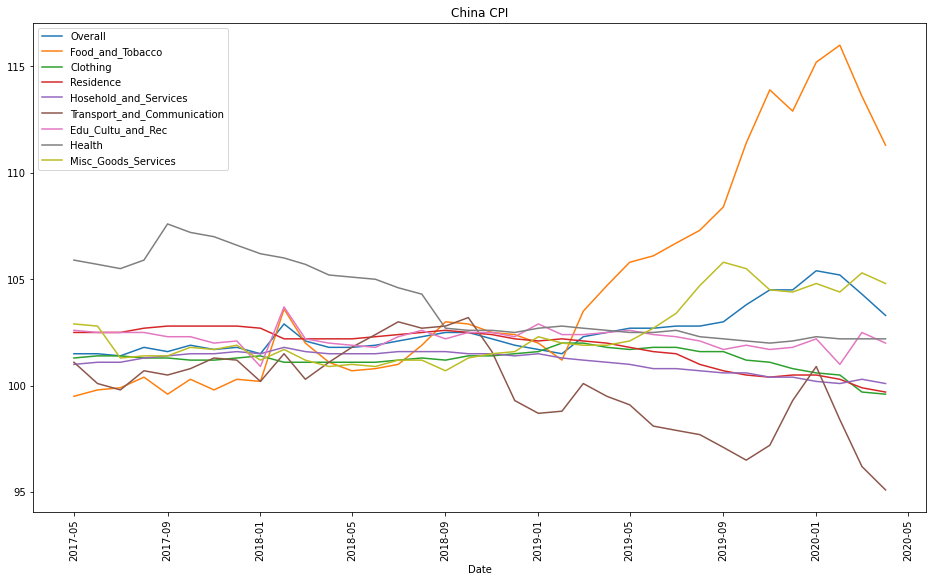

In [13]:
#start_date= CPI.loc[CPI.Date == np.datetime64('2006-01-01')].index[0]
#end_date= CPI.loc[CPI.Date == np.datetime64('2012-01-01')].index[0]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(1,CPI.shape[1]):
  try:
    plt.plot(CPI.iloc[:,0], CPI.iloc[:, column],label = f'{CPI.iloc[:,column].name}')
  except: 
    pass

plt.legend()
plt.title('China CPI')
plt.xlabel("Date")
plt.show()

going to do sma for each of the lines again to smooth them out. we can see a bit of an increase during the start of 2020 meaning consumer prices rose slightly during covid which makes sense. otherwise the CPI is pretty constant based on this data

In [14]:
CPI_sma = CPI
for i in range(1, 10):
  CPI_sma[f'{CPI.iloc[:,i].name}_sma'] = CPI.loc[:,[f'{CPI.iloc[:,i].name}']].rolling(window=6, center = True).mean() # simply moving average over 6 months

CPI_sma

Date Overall  ...  Health_sma Misc_Goods_Services_sma
0  2017-05-01   101.5  ...         NaN                     NaN
1  2017-06-01   101.5  ...         NaN                     NaN
2  2017-07-01   101.4  ...         NaN                     NaN
3  2017-08-01   101.8  ...  106.300000              101.933333
4  2017-09-01   101.6  ...  106.483333              101.733333
5  2017-10-01   101.9  ...  106.633333              101.583333
6  2017-11-01   101.7  ...  106.750000              101.566667
7  2017-12-01   101.8  ...  106.766667              101.616667
8  2018-01-01   101.5  ...  106.450000              101.583333
9  2018-02-01   102.9  ...  106.116667              101.433333
10 2018-03-01   102.1  ...  105.800000              101.316667
11 2018-04-01   101.8  ...  105.533333              101.150000
12 2018-05-01   101.8  ...  105.266667              101.150000
13 2018-06-01   101.9  ...  104.983333              101.066667
14 2018-07-01   102.1  ...  104.483333              100.983333
15 2018-08-01   102.3  ...  104.050000              101.050000
16 2018-09-01   102.5  ...  103.633333              101.133333
17 2018-10-01   102.5  ...  103.216667              101.250000
18 2018-11-01   102.2  ...  102.900000              101.433333
19 2018-12-01   101.9  ...  102.650000              101.566667
20 2019-01-01   101.7  ...  102.650000              101.766667
21 2019-02-01   101.5  ...  102.650000              101.866667
22 2019-03-01   102.3  ...  102.633333              101.966667
23 2019-04-01   102.5  ...  102.633333              102.150000
24 2019-05-01   102.7  ...  102.616667              102.333333
25 2019-06-01   102.7  ...  102.533333              102.783333
26 2019-07-01   102.8  ...  102.450000              103.433333
27 2019-08-01   102.8  ...  102.366667              104.033333
28 2019-09-01     103  ...  102.283333              104.433333
29 2019-10-01   103.8  ...  102.216667              104.716667
30 2019-11-01   104.5  ...  102.166667              104.950000
31 2019-12-01   104.5  ...  102.150000              104.900000
32 2020-01-01   105.4  ...  102.150000              104.816667
33 2020-02-01   105.2  ...  102.166667              104.700000
34 2020-03-01   104.3  ...         NaN                     NaN
35 2020-04-01   103.3  ...         NaN                     NaN

[36 rows x 19 columns]

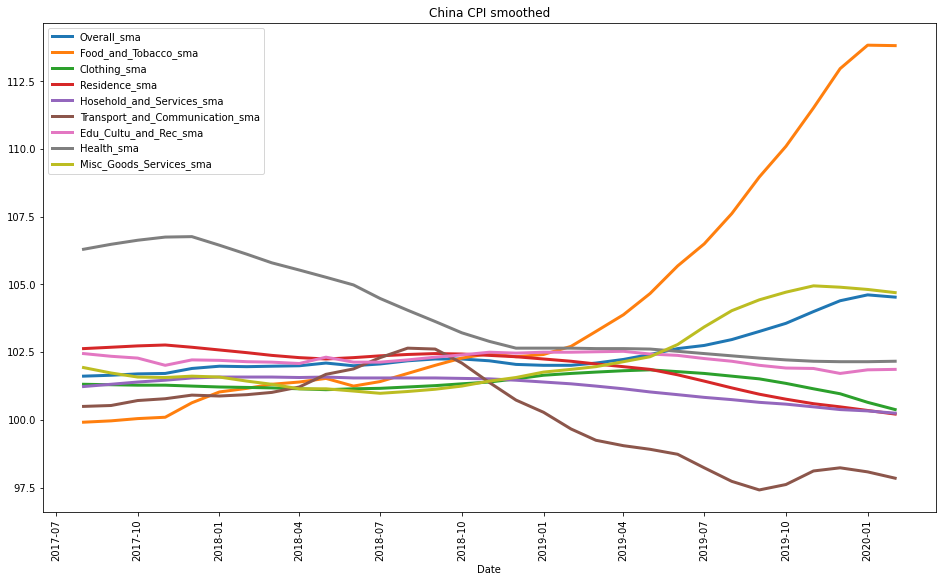

In [15]:
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(10,CPI.shape[1]):
  try:
    plt.plot(CPI.iloc[:,0], CPI.iloc[:, column],label = f'{CPI.iloc[:,column].name}', linewidth = 3)
  except: 
    pass

plt.legend()
plt.title('China CPI smoothed')
plt.xlabel("Date")
plt.show()

Yea so cost of food rose/got inflated sharply as miscelaneous goods and services also rose during covid in china while transportation costs/inflation dropped.

# China Unemployment

In [16]:
UR1 = UR_raw.T
UR = UR1.iloc[1:,:2]
UR.columns = UR1.iloc[0,:2]
UR = UR.dropna()

time = np.arange('2018-01', '2020-04', dtype = 'datetime64[M]')
UR.index = time[::-1]
UR = UR.sort_index(axis = 0)

UR['Date'] = UR.index
UR.index = np.arange(0,UR.shape[0])
col = UR.pop('Date') # cut the Months column from where it was at the end of the table
UR.insert(0, col.name, col) # insert the column at column 0 of the data frame

UR

Indicators       Date  ... The Urban Surveyed Unemployment Rate in 31 Major Cities(%)
0          2018-01-01  ...                                                4.9        
1          2018-02-01  ...                                                4.8        
2          2018-03-01  ...                                                4.9        
3          2018-04-01  ...                                                4.7        
4          2018-05-01  ...                                                4.7        
5          2018-06-01  ...                                                4.7        
6          2018-07-01  ...                                                  5        
7          2018-08-01  ...                                                4.9        
8          2018-09-01  ...                                                4.7        
9          2018-10-01  ...                                                4.7        
10         2018-11-01  ...                                                4.7        
11         2018-12-01  ...                                                4.7        
12         2019-01-01  ...                                                4.8        
13         2019-02-01  ...                                                  5        
14         2019-03-01  ...                                                5.1        
15         2019-04-01  ...                                                  5        
16         2019-05-01  ...                                                  5        
17         2019-06-01  ...                                                  5        
18         2019-07-01  ...                                                5.2        
19         2019-08-01  ...                                                5.2        
20         2019-09-01  ...                                                5.2        
21         2019-10-01  ...                                                5.1        
22         2019-11-01  ...                                                5.1        
23         2019-12-01  ...                                                5.2        
24         2020-01-01  ...                                                5.2        
25         2020-02-01  ...                                                5.7        
26         2020-03-01  ...                                                5.7        

[27 rows x 3 columns]

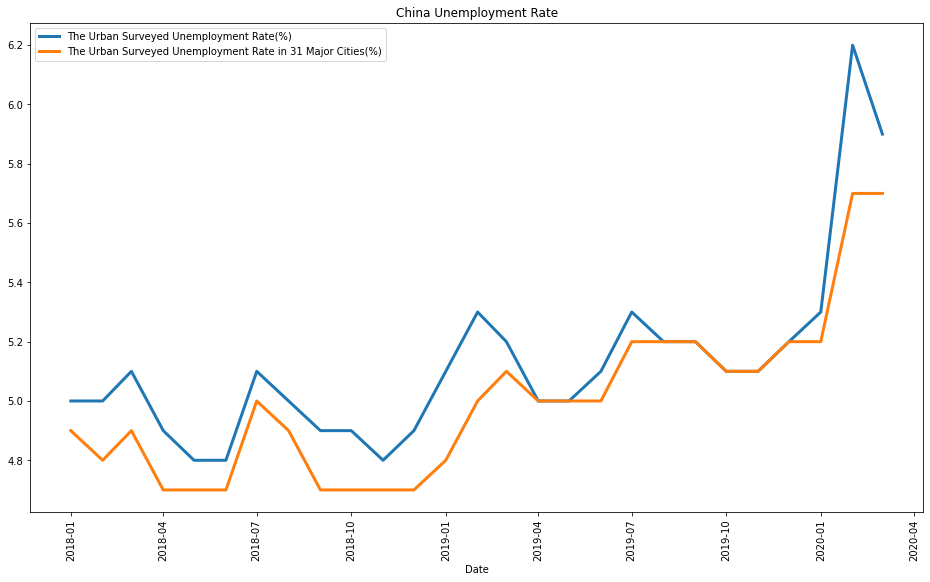

In [17]:
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(1,UR.shape[1]):
  try:
    plt.plot(UR.iloc[:,0], UR.iloc[:, column],label = f'{UR.iloc[:,column].name}', linewidth = 3)
  except: 
    pass

plt.legend()
plt.title('China Unemployment Rate')
plt.xlabel("Date")
plt.show()

unemployment after covid increased a bit but certainly not as much as other nations such as canada and the us... cant really tell what is happening currently if it has decreased yet or is still increasing.